In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

from imblearn.over_sampling import RandomOverSampler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Nadam
from keras.callbacks import LearningRateScheduler



### Read the data from github repository and drop uniqe values from it, also combining colunms which are related each other

In [234]:
csv_file = 'smoking.csv'
df = pd.read_csv(csv_file)
pd.set_option('display.max_columns', None)
##missing_count = df.isna().sum()  0
##print(missing_count)   0

#No need id because it is unique to everyone
df = df.sort_values(by = 'ID')
df = df.drop(['ID'], axis = 1)
df = df.drop(['gender'], axis = 1)
## No need for oral column since every value is 1
df = df.drop(['oral'], axis = 1)

## Encode
label_encoder = preprocessing.LabelEncoder()
df['tartar'] = label_encoder.fit_transform(df['tartar'])

### Fix the blind values for eyesight, then combine eyesight

In [235]:
## Combine left and right eyesight and hearing
columns_to_replace = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']

# 9.9 is status of blind so we replace it with 0
df[columns_to_replace] = df[columns_to_replace].replace(9.9, 0)

df['eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
df['hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)
df = df.drop(['eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'],axis = 1)

In [236]:
#Describe data to look is there any outlayer values
df.describe()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288,0.993679,1.025865
std,12.071418,9.194597,12.820306,9.274223,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070,0.301393,0.137929
min,20.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40.000000,160.000000,55.000000,76.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,40.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,55.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,85.000000,190.000000,135.000000,129.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Pieplot

<AxesSubplot: ylabel='smoking'>

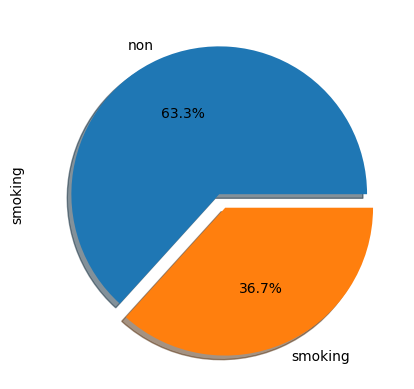

In [237]:

df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

## CatPlot

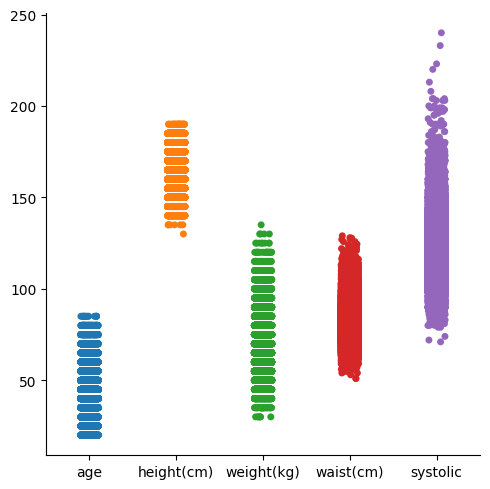

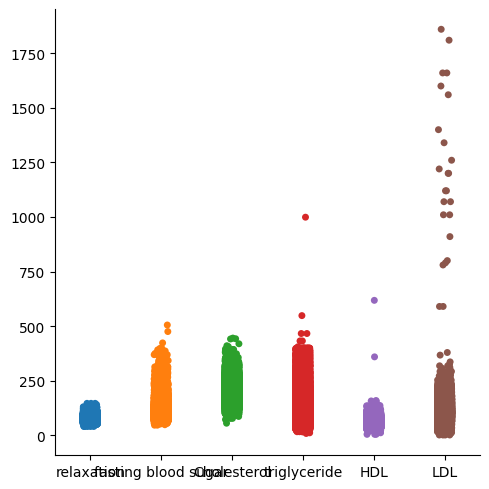

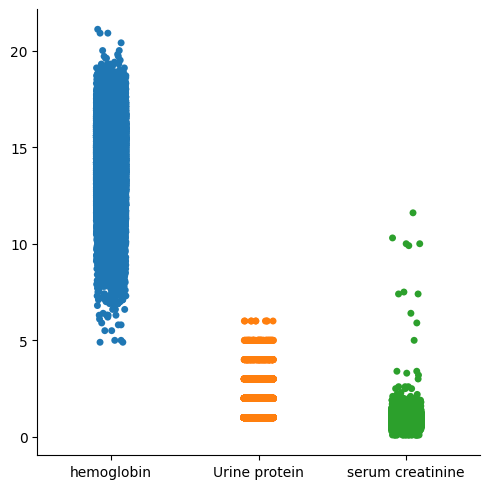

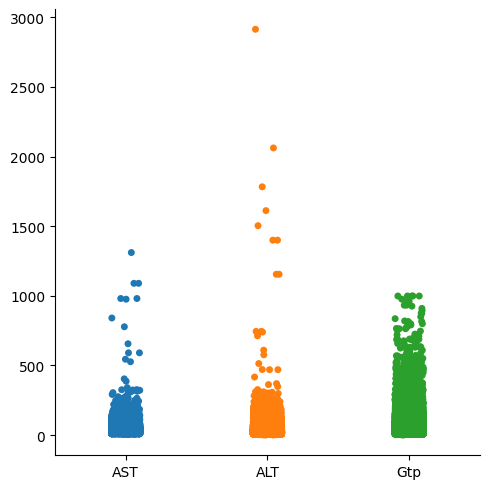

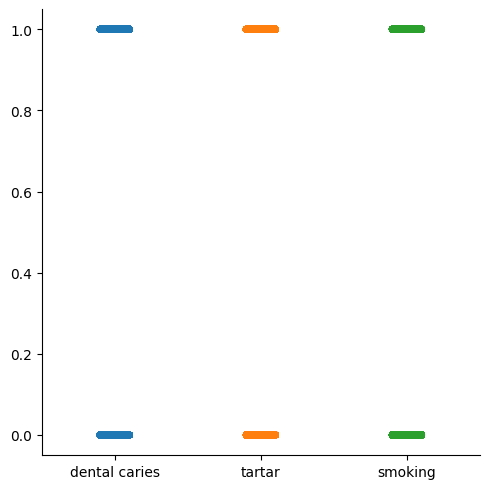

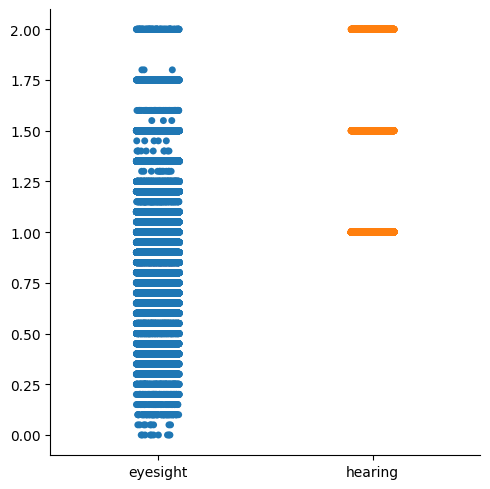

In [238]:
#CatPlots
sns.catplot(df.iloc[:, 0:5])
sns.catplot(df.iloc[:, 5:11])
sns.catplot(df.iloc[:, 11:14])
sns.catplot(df.iloc[:, 14:17])
sns.catplot(df.iloc[:, 17:20])
sns.catplot(df.iloc[:, 20:22])

## HeatMap

<AxesSubplot: >

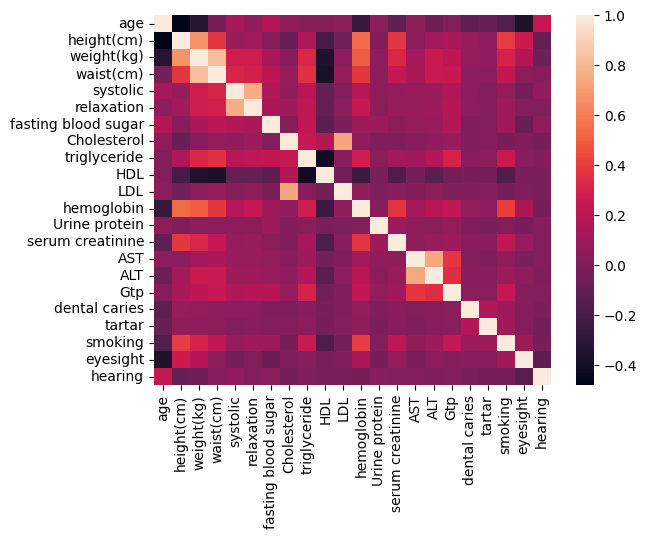

In [239]:
#HeatMap
corelation=df.corr()
sns.heatmap(corelation)

## Correaliton map with number to understand feature effects more clear

Text(0.5, 1.0, 'Correlation Heatmap')

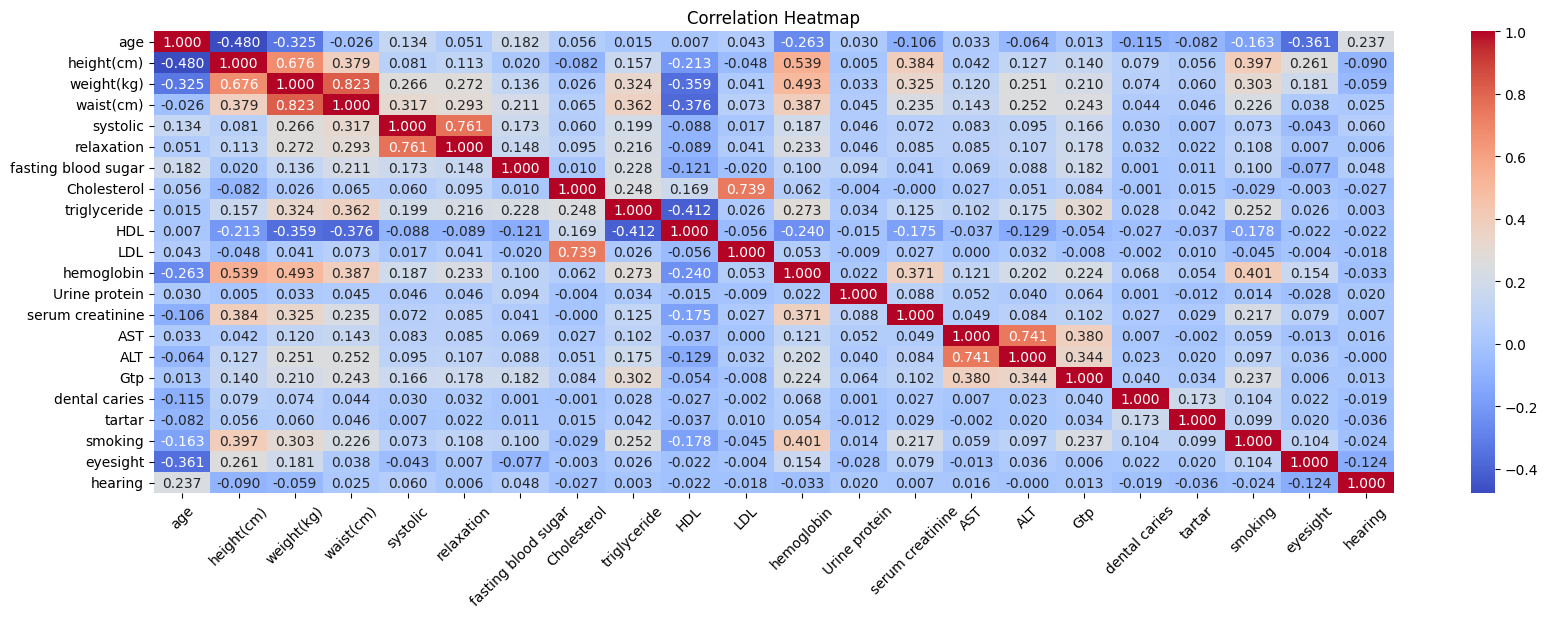

In [240]:
correlation_matrix = df.corr()
column_names = df.columns.tolist()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 6))
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
heatmap.set_xticklabels(column_names, rotation=45)
heatmap.set_yticklabels(column_names, rotation=0)
plt.title('Correlation Heatmap')

### Using quantile (IQR) method to get rid of outliers in the dataset

In [264]:
# using the Interquartile Range (IQR) method

num_columns = df.shape[0]
new_df = df.copy()
print("Sample size before iqr:", num_columns)

columns_of_interest = ['ALT', 'AST', 'fasting blood sugar', 'triglyceride', 'HDL', 'LDL', 'serum creatinine', 'Gtp', 'systolic']

# Calculating IQR for each specified column
for column in columns_of_interest:
    q1, q3 = np.percentile(new_df[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1 * iqr)  
    upper_bound = q3 + (1 * iqr)
    
    # Filtering outliers for the current column in the new DataFrame
    outliers_mask = (new_df[column] < lower_bound) | (new_df[column] > upper_bound)
    new_df = new_df[~outliers_mask]

num_columns = new_df.shape[0]
print("Sample size after iqr", num_columns)
# ss 33073 when using 2* iqr_value
# ss 36000 3*
# ss 37564 4*
# ss 38215 5*

Sample size before iqr: 55692
Sample size after iqr 30740


In [267]:
new_df.describe()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000,30740.000000
mean,43.309694,164.052212,63.505368,79.908939,118.903578,74.246975,94.163793,191.800260,101.796747,57.608848,113.881978,14.350085,1.063956,0.863640,21.604196,19.368575,22.491574,0.203643,0.544893,0.292615,1.000133,1.023292
std,11.994178,9.348053,11.613194,8.473700,11.527333,8.582840,8.732895,29.819592,43.781512,11.785943,27.158713,1.570124,0.325673,0.181145,4.844991,7.808586,9.769234,0.402713,0.497989,0.454971,0.300763,0.131349
min,20.000000,135.000000,30.000000,54.000000,92.000000,40.000000,75.000000,55.000000,11.000000,31.000000,52.000000,4.900000,1.000000,0.400000,11.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,110.000000,69.000000,88.000000,171.000000,68.000000,49.000000,94.000000,13.300000,1.000000,0.700000,18.000000,14.000000,15.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,40.000000,165.000000,65.000000,80.000000,119.000000,74.000000,94.000000,191.000000,93.000000,57.000000,113.000000,14.500000,1.000000,0.900000,21.000000,18.000000,20.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,50.000000,170.000000,70.000000,85.600000,128.000000,80.000000,100.000000,212.000000,128.000000,66.000000,133.000000,15.500000,1.000000,1.000000,25.000000,23.000000,28.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,85.000000,190.000000,125.000000,124.000000,146.000000,112.000000,117.000000,295.000000,225.000000,85.000000,178.000000,19.700000,6.000000,1.300000,35.000000,47.000000,50.000000,1.000000,1.000000,1.000000,2.000000,2.000000


## Oversampling unbalanced data to get more accurate result while training and testing

In [268]:
Y = new_df['smoking']
X = new_df.drop(['smoking'], axis=1)
## Using RandomOverampler to balance data

RES = RandomOverSampler(random_state=32)
# Up-sample minority and Down-sample majority
X, Y = RES.fit_resample(X, Y)
print(pd.DataFrame(Y).describe())



balanced_df = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)
scaler = StandardScaler()
X_standard = pd.DataFrame(scaler.fit_transform(X))
scaler2 = MinMaxScaler()
X_min_max = pd.DataFrame(scaler2.fit_transform(X))


            smoking
count  43490.000000
mean       0.500000
std        0.500006
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000


In [269]:
balanced_df.describe()

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,eyesight,hearing,smoking
count,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000,43490.000000
mean,42.281444,165.721085,65.002874,80.613504,119.094045,74.483031,94.341159,190.864865,105.065164,56.628558,113.288618,14.621072,1.063854,0.886277,21.587284,19.801862,23.835089,0.222304,0.565647,1.013364,1.022097,0.500000
std,11.993693,9.070214,11.613565,8.382651,11.350901,8.500719,8.801757,29.780647,44.417632,11.735693,27.282049,1.506425,0.323516,0.177048,4.802387,7.894356,10.077103,0.415799,0.495677,0.300740,0.127211,0.500006
min,20.000000,135.000000,30.000000,54.000000,92.000000,40.000000,75.000000,55.000000,11.000000,31.000000,52.000000,4.900000,1.000000,0.400000,11.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35.000000,160.000000,55.000000,75.000000,110.000000,69.000000,88.000000,169.000000,70.000000,48.000000,93.000000,13.700000,1.000000,0.800000,18.000000,14.000000,16.000000,0.000000,0.000000,0.800000,1.000000,0.000000
50%,40.000000,165.000000,65.000000,80.500000,119.000000,75.000000,94.000000,190.000000,97.000000,56.000000,112.000000,14.800000,1.000000,0.900000,21.000000,18.000000,22.000000,0.000000,1.000000,1.000000,1.000000,0.500000
75%,50.000000,175.000000,70.000000,86.000000,128.000000,80.000000,100.000000,212.000000,133.000000,65.000000,133.000000,15.700000,1.000000,1.000000,25.000000,24.000000,30.000000,0.000000,1.000000,1.200000,1.000000,1.000000
max,85.000000,190.000000,125.000000,124.000000,146.000000,112.000000,117.000000,295.000000,225.000000,85.000000,178.000000,19.700000,6.000000,1.300000,35.000000,47.000000,50.000000,1.000000,1.000000,2.000000,2.000000,1.000000


### Scaled CatPlot


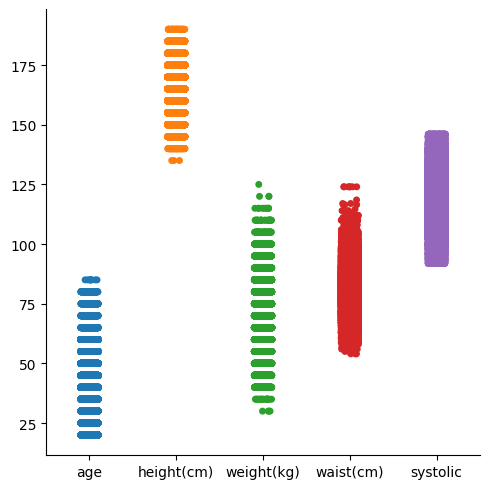

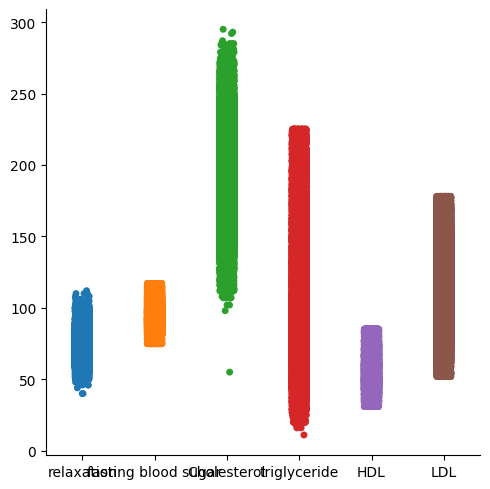

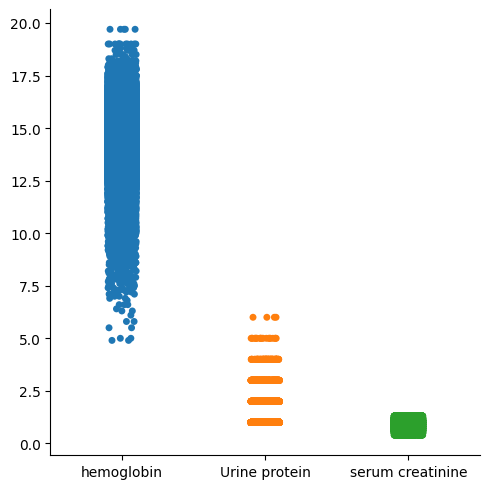

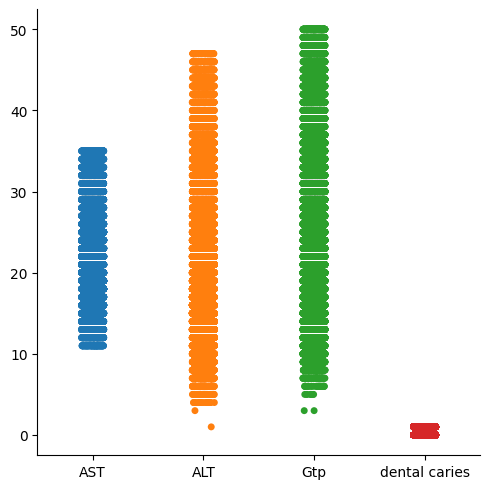

In [270]:
#CatPlots
sns.catplot(balanced_df.iloc[:, 0:5])
sns.catplot(balanced_df.iloc[:, 5:11])
sns.catplot(balanced_df.iloc[:, 11:14])
sns.catplot(balanced_df.iloc[:, 14:18])

### Scaled BoxPlot


### Scaled HeatMap

<AxesSubplot: >

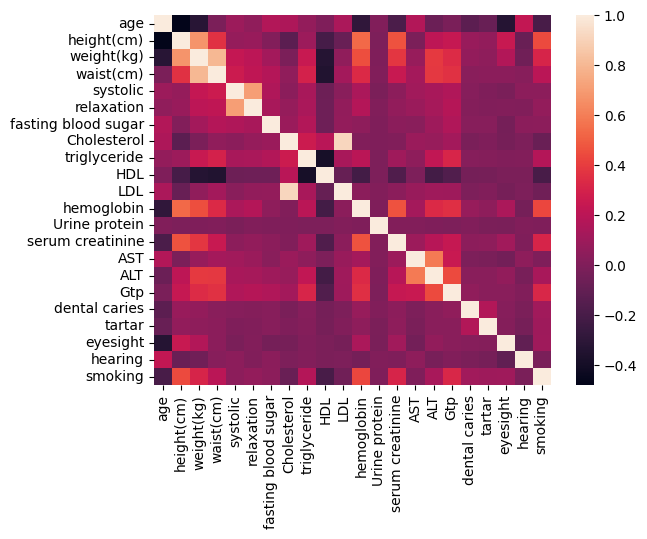

In [271]:
#HeatMap
corelation=balanced_df.corr()
sns.heatmap(corelation)

<AxesSubplot: ylabel='smoking'>

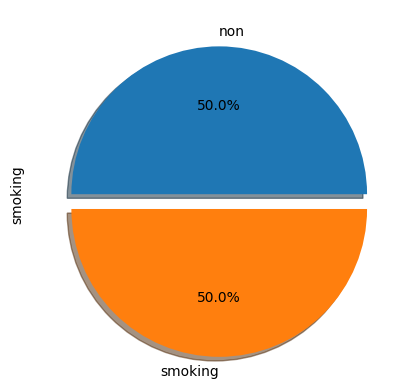

In [272]:

balanced_df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

### Balanced dataframe correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

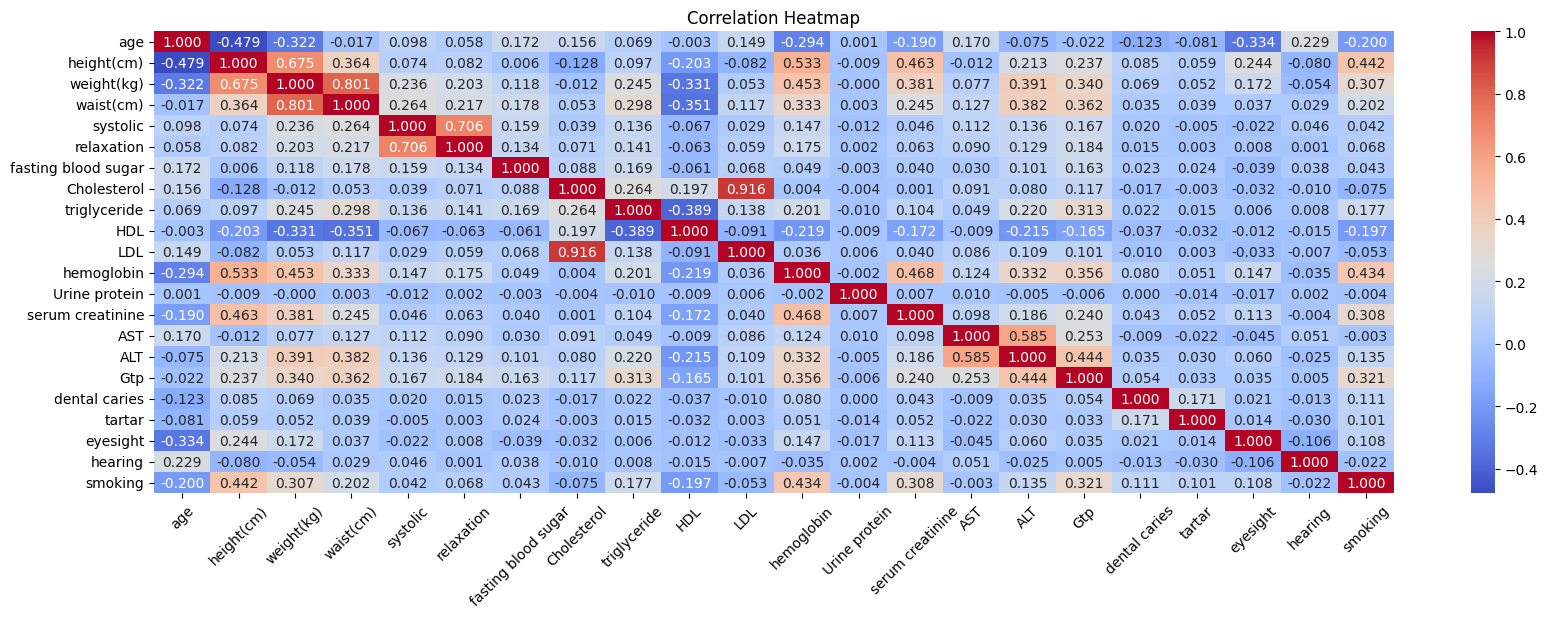

In [273]:
correlation_matrix = balanced_df.corr()
column_names = balanced_df.columns.tolist()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 6))
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
heatmap.set_xticklabels(column_names, rotation=45)
heatmap.set_yticklabels(column_names, rotation=0)
plt.title('Correlation Heatmap')

# FEATURE SELECTION

In [274]:
# Lets find how many features are needed using a loop and 5 different feature selection method
feature_count = 12 # will go to 8
RFC = RandomForestClassifier(n_estimators=50)
model_list = {
    'Logistic': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'chi2': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Lasso': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'mutual': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'PCA': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'RFC': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'KNN': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Stacking': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Max_voting': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Deep_learning': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0}
}

for key in model_list:
    model_list[key]['accuracy'] = 0

def add_list(model_name, test_data, pred_data, feature_count):

  precision = precision_score(test_data, pred_data)
  recall = recall_score(test_data, pred_data)
  f1 = f1_score(test_data, pred_data)

  roc_auc = roc_auc_score(test_data, pred_data)
  accuracy = accuracy_score(test_data, pred_data)

  # Assign these values to the model dictionary
  model_list[model_name]['precision'] = precision
  model_list[model_name]['recall'] = recall
  model_list[model_name]['f1'] = f1
  model_list[model_name]['feature_count'] = feature_count
  model_list[model_name]['roc_auc'] = roc_auc
  model_list[model_name]['accuracy'] = accuracy     
  print(accuracy)


### Lasso

In [275]:
#Only lasso is applied once
lasso = Lasso(alpha=0.015)
lasso.fit(X_standard, Y)

# Get feature which does not have coeffient 0
selected_features = X_standard.columns[lasso.coef_ != 0]
X_lasso = X_standard[selected_features]
X_train_lasso, X_test_lasso, y_train_lasoo, y_test_lasso = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)
RFC.fit(X_train_lasso, y_train_lasoo)


y_pred_lasso = RFC.predict(X_test_lasso)

add_list('Lasso', y_test_lasso, y_pred_lasso, X_lasso.shape[1])
print(X_lasso.shape[1])

0.9126235916302599
12


### Chi2 and mutual_info with SelectKBest

In [276]:
def RFC_train_test_SelectKBest(method, feature_count, X, Y, name):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list[name]['accuracy']:
        add_list(name, y_test, y_pred, feature_count)
    


feature_count = 17
while feature_count > 10:
    RFC_train_test_SelectKBest(chi2, feature_count, X_min_max, Y, 'chi2')
    RFC_train_test_SelectKBest(mutual_info_classif, feature_count, X, Y, 'mutual')
    feature_count -= 1


0.9103242124626351
0.9129684985054035
0.9114739020464474
0.915612784548172
0.9135433432973097
0.9137732812140722


### PCA


In [277]:
# Apply PCA
# chi2 gives best performance at feature numberr 16 so we will use 16 feature end of the code from herek_best = SelectKBest(score_func=method, k=feature_count)
k_best = SelectKBest(score_func=chi2, k=model_list['chi2']['feature_count'])
X_PCA = k_best.fit_transform(X_min_max, Y)



# Initialize SVM classifier
pipe = make_pipeline(PCA(n_components=5), RFC)

# Specify the number of folds for K-fold cross-validation
k_folds = 10

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validatio
accuracy_scores=[]
for train_index, test_index in kf.split(X_PCA):
    
    X_train, X_test = X_PCA[train_index], X_PCA[test_index]
    y_train, y_test = Y.to_numpy()[train_index], Y.to_numpy()[test_index]
    
    # Train the model on the training fold
    pipe.fit(X_train, y_train)
    
    # Predict on the validation fold
    predictions = pipe.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)

    if accuracy >= model_list['PCA']['accuracy']:
        add_list('PCA', y_test, predictions, 5)



0.9126235916302599
0.9181421016325592
0.9197516670498965


### RFC

In [278]:
def RFC_train_test_RFC(X, Y, feature_count):
    RFC.fit(X, Y)

    # Access feature importances
    feature_importances = RFC.feature_importances_

    # Sort the features
    sorted_feature_indices = feature_importances.argsort()[::-1]

    selected_feature_indices = sorted_feature_indices[:feature_count]

    # Select specified features within cuDF
    X_selected = X_standard.iloc[:, selected_feature_indices]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list['RFC']['accuracy']:
        add_list('RFC', y_test, y_pred, feature_count)

feature_count = 10
while feature_count < 17:
    RFC_train_test_RFC(X_standard, Y, feature_count)
    feature_count += 1


0.9077948953782479
0.9100942745458727
0.911243964129685


In [279]:
def logistic_chi(method, feature_count, X, Y, LR):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > model_list['Logistic']['accuracy']:
        add_list('Logistic', y_test, y_pred, feature_count)

### Logisctic Reggression

In [280]:
#Logistic Regression Here
X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
Logistic_model = LogisticRegression(random_state=42,max_iter=10000)


# Iterate the logictic reggersion for the different number of features
feature_count = 19
while feature_count > 10:
    logistic_chi(chi2, feature_count, X_min_max, Y,Logistic_model)
    feature_count -= 1


0.7476431363531847
0.7477581053115658
0.7481030121867096
0.7489077948953783
0.7491377328121407
0.7498275465624281


### KNN


In [281]:
#KNN here  
X_train, X_test, y_train, y_test = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)    
accuracy_knn = []
# Itare over 3 to 15 neigbors to find best n_neighbors
for i in range(3,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  accuracy_knn.append(accuracy_score(y_test, pred_i))

  accuracy = accuracy_score(y_test, pred_i)


  if accuracy >= model_list['KNN']['accuracy']:
    add_list('KNN', y_test, pred_i, i)      



0.8207633938836514


### Max voting

In [282]:
#Max voting here
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier(n_estimators=150,random_state=42)
RFC_2 = RandomForestClassifier(n_estimators=200, max_depth=20)

final_model = VotingClassifier( estimators=[ ('rf', RFC),('dt', DTC ),('gb', GBC), ('rf2', RFC_2)  ])
 
# training all the model on the train dataset
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
add_list('Max_voting', y_test, pred_final, x_train.shape[1])


0.9104391814210163


### Stacking

In [283]:
#Stack the methods with hyper paramaters
base_models = [
    ('logistic', LogisticRegression(max_iter=500)),
    ('random_forest', RandomForestClassifier(n_estimators=75)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=75)),
    ('Extra', ExtraTreesClassifier(n_estimators=75)),
    ('adaboost', AdaBoostClassifier(n_estimators=70))  
]

stacked_model = StackingClassifier(estimators = base_models, final_estimator=RandomForestClassifier(n_estimators=100,max_depth=30))
x_train, x_test, y_train, y_test = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)


# Train the stacking model
stacked_model.fit(x_train, y_train) 

# Make predictions
stacked_predictions = stacked_model.predict(x_test)

add_list('Stacking', y_test, stacked_predictions, x_train.shape[1])


0.9434352724764313


### Deep Learning

In [357]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  tf.config.set_visible_devices(gpus[0], 'GPU')
  logical_gpus = tf.config.list_logical_devices('GPU')
  print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

lr = 0.0002  # Reduced learning rate
nadam = Nadam(learning_rate=0.002)
def lr_schedule(epoch):
    lr = 0.0003
    if epoch >= 50:
       lr = 0.0001
    return lr

# Creating a Learning Rate Scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_standard, Y, test_size=0.1, shuffle=True, random_state=13)

# Define the model architecture then add layers, also add dropouts to avoid overfitting
model = Sequential()
model.add(Dense(512, activation='relu',input_dim=X_train_dl.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
#layer for classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_dl, y_train_dl, batch_size=64, epochs=50, validation_split=0.002,callbacks=[lr_scheduler], shuffle=True)



1 Physical GPUs, 1 Logical GPU
Epoch 1/50
611/611 [==============================] - 3s 4ms/step - loss: 0.5056 - accuracy: 0.7557 - val_loss: 0.5201 - val_accuracy: 0.7722 - lr: 3.0000e-04
Epoch 2/50
611/611 [==============================] - 2s 4ms/step - loss: 0.4860 - accuracy: 0.7687 - val_loss: 0.5023 - val_accuracy: 0.7722 - lr: 3.0000e-04
Epoch 3/50
611/611 [==============================] - 3s 4ms/step - loss: 0.4741 - accuracy: 0.7751 - val_loss: 0.4594 - val_accuracy: 0.8101 - lr: 3.0000e-04
Epoch 4/50
611/611 [==============================] - 3s 4ms/step - loss: 0.4598 - accuracy: 0.7829 - val_loss: 0.4474 - val_accuracy: 0.7975 - lr: 3.0000e-04
Epoch 5/50
611/611 [==============================] - 2s 4ms/step - loss: 0.4432 - accuracy: 0.7917 - val_loss: 0.4264 - val_accuracy: 0.8101 - lr: 3.0000e-04
Epoch 6/50
611/611 [==============================] - 2s 4ms/step - loss: 0.4204 - accuracy: 0.8065 - val_loss: 0.3992 - val_accuracy: 0.7975 - lr: 3.0000e-04
Epoch 7/50
611/

In [359]:
y_predict_dl = model.predict(X_test_dl)
threshold = 0.6 # Define your threshold
y_predict_binary = np.where(y_predict_dl > threshold, 1, 0)
add_list('Deep_learning',y_test_dl, y_predict_binary, x_train.shape[1])

  1/136 [..............................] - ETA: 2s

136/136 [==============================] - 0s 1ms/step
0.9280294320533456


In [360]:
best_method = None
best_acc = 0

for method, info in model_list.items():
    acc = info['accuracy']
    if acc > best_acc:
        best_method = method
        best_acc = acc
    print(f"{method} has accuracy={info['accuracy']:.4f} roc_auc={info['roc_auc']:.4f}, f1={info['f1']:.4f}, precision={info['precision']:.4f}, recall={info['recall']:.4f}, feature_count={info['feature_count']}")

print(f"The best feature selection method is '{best_method}' with an accuracy of {best_acc:.4f} and feature count {model_list[best_method]['feature_count']}")

Logistic has accuracy=0.7498 roc_auc=0.7503, f1=0.7600, precision=0.7243, recall=0.7995, feature_count=12
chi2 has accuracy=0.9138 roc_auc=0.9142, f1=0.9170, precision=0.8766, recall=0.9613, feature_count=12
Lasso has accuracy=0.9126 roc_auc=0.9130, f1=0.9159, precision=0.8756, recall=0.9601, feature_count=12
mutual has accuracy=0.9156 roc_auc=0.9160, f1=0.9187, precision=0.8788, recall=0.9624, feature_count=16
PCA has accuracy=0.9198 roc_auc=0.9195, f1=0.9240, precision=0.8816, recall=0.9707, feature_count=5
RFC has accuracy=0.9112 roc_auc=0.9117, f1=0.9147, precision=0.8732, recall=0.9603, feature_count=15
KNN has accuracy=0.8208 roc_auc=0.8214, f1=0.8316, precision=0.7779, recall=0.8933, feature_count=3
Stacking has accuracy=0.9434 roc_auc=0.9432, f1=0.9412, precision=0.9702, recall=0.9139, feature_count=12
Max_voting has accuracy=0.9104 roc_auc=0.9109, f1=0.9144, precision=0.8685, recall=0.9654, feature_count=21
Deep_learning has accuracy=0.9280 roc_auc=0.9278, f1=0.9309, precision

In [361]:
model_df = pd.DataFrame.from_dict(model_list, orient='index')
model_df = model_df.drop(['feature_count'],axis=1)

# Print the DataFrame
print(model_df)

                     f1  precision    recall   roc_auc  accuracy
Logistic       0.760035   0.724254  0.799536  0.750269  0.749828
chi2           0.916999   0.876640  0.961253  0.914195  0.913773
Lasso          0.915892   0.875582  0.960093  0.913045  0.912624
mutual         0.918715   0.878814  0.962413  0.916029  0.915613
PCA            0.924048   0.881645  0.970736  0.919457  0.919752
RFC            0.914696   0.873207  0.960325  0.911680  0.911244
KNN            0.831623   0.777935  0.893271  0.821408  0.820763
Stacking       0.941219   0.970197  0.913921  0.943173  0.943435
Max_voting     0.914405   0.868503  0.965429  0.910928  0.910439
Deep_learning  0.930920   0.900897  0.963014  0.927778  0.928029


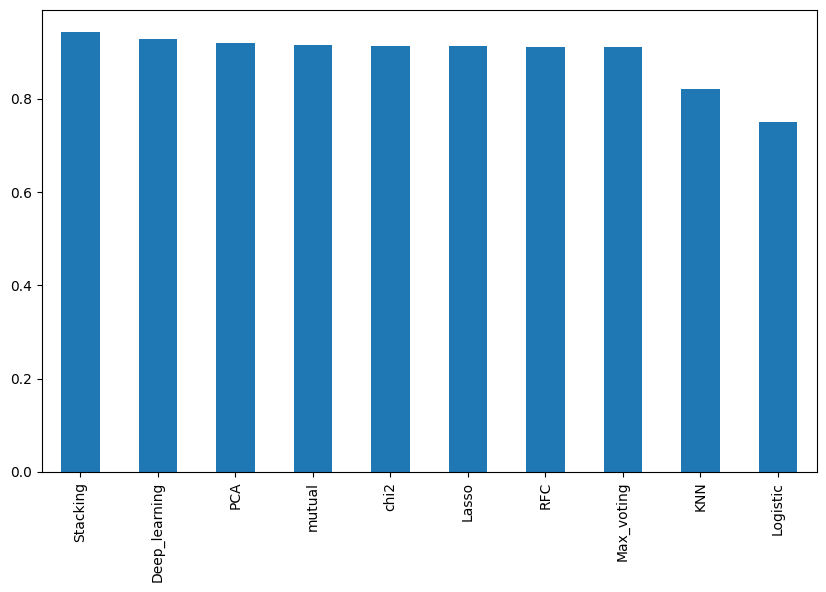

In [362]:
model_df = model_df.sort_values(by='accuracy', ascending=False)
plt = model_df['accuracy'].plot(kind='bar', figsize=(10, 6))

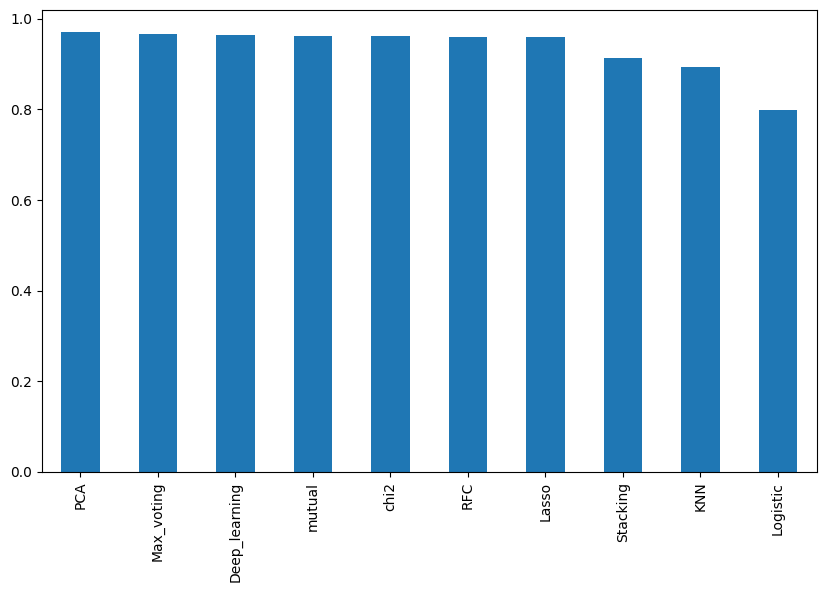

In [363]:
model_df = model_df.sort_values(by='recall', ascending=False)
plt = model_df['recall'].plot(y='Recall score',kind='bar', figsize=(10, 6))

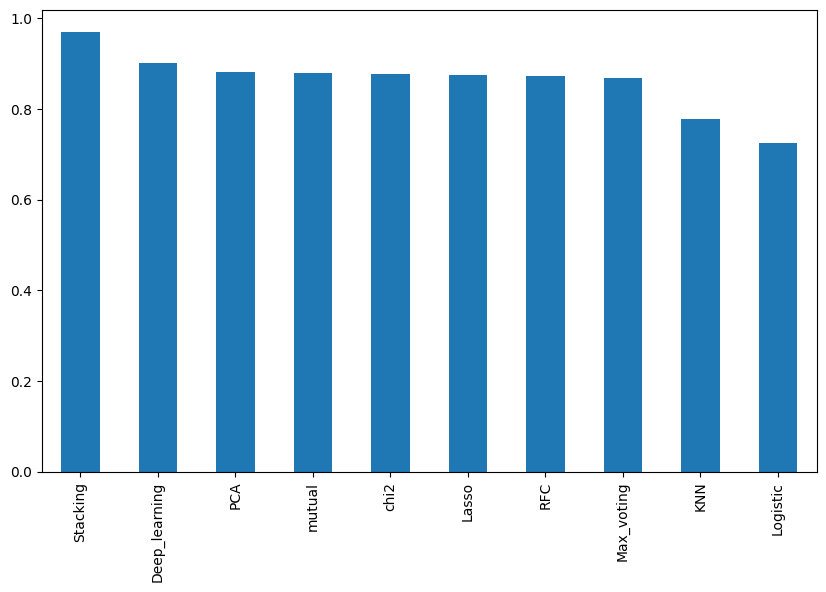

In [364]:
model_df = model_df.sort_values(by='precision', ascending=False)
plt = model_df['precision'].plot(kind='bar', figsize=(10, 6))

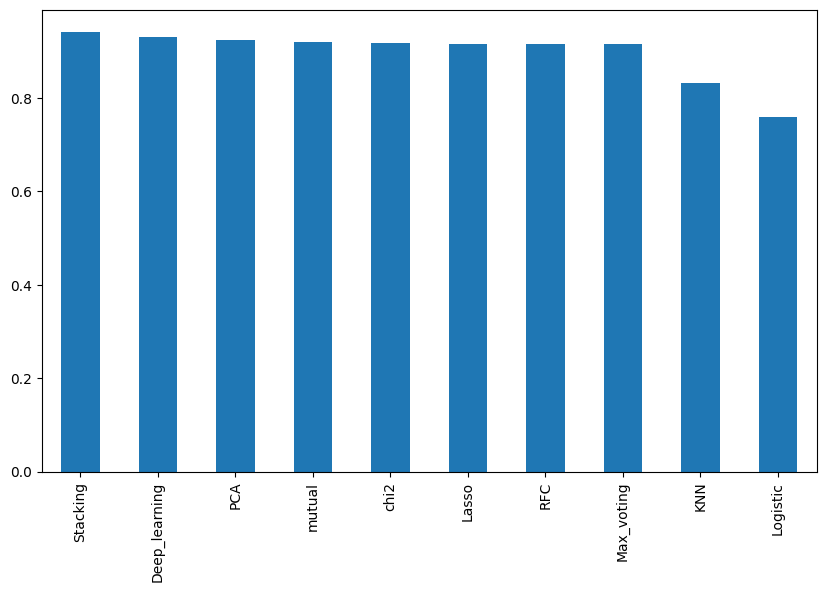

In [365]:
model_df = model_df.sort_values(by='f1', ascending=False)
plt = model_df['f1'].plot(kind='bar', figsize=(10, 6))

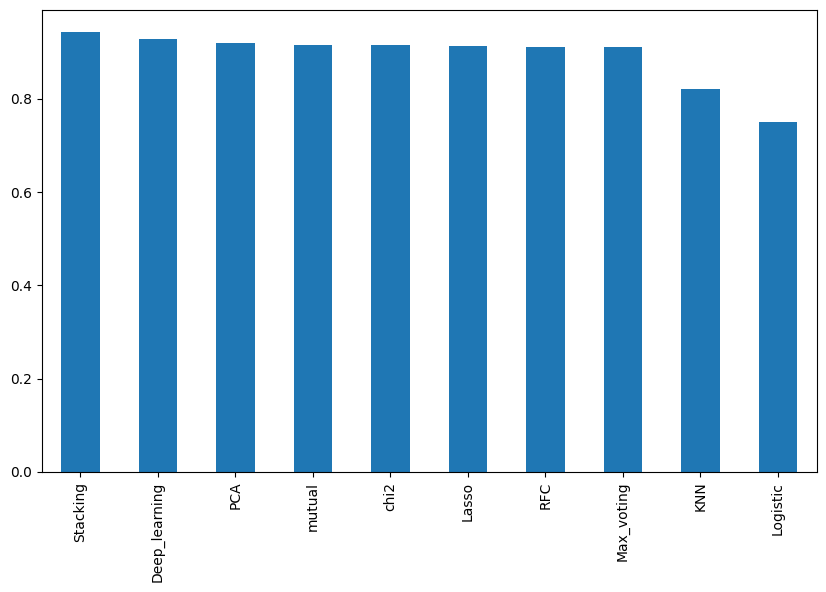

In [366]:
model_df = model_df.sort_values(by='roc_auc', ascending=False)
plt = model_df['roc_auc'].plot(kind='bar', figsize=(10, 6))